In [1]:
import math
import statistics
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom
from scipy.stats import skew

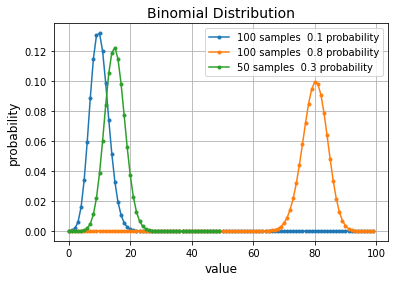

In [2]:
# calculate and plot binomial distribution - examples
# example = (p is probability, k is number of samples)
examples = [(0.1, 100), (0.8, 100), (0.3, 50)]

for values in examples:
    p = values[0]
    k = values[1]
    bin_values = []
    x_values = [x for x in range(k)]
    for n in range(k):
        factor = math.factorial(k) / (math.factorial(n) * math.factorial(k - n))
        bin_values.append(factor * (p**n) * ((1 - p)**(k - n)))
    plt.plot(x_values, bin_values, marker='.', label='{} samples  {} probability'.format(k, p))

plt.title('Binomial Distribution', fontsize=14)
plt.ylabel('probability', fontsize=12)
plt.xlabel('value', fontsize=12)
plt.legend()
plt.grid()
plt.savefig('binom_dist.svg')
plt.show();

expected successes: 800000
total successes: 800581


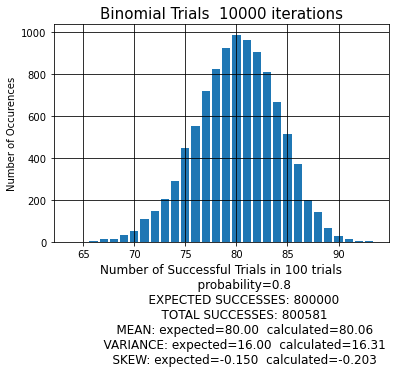

In [3]:
# binomial process - simulation of counting success
from numpy.random import binomial
# define the parameters of the distribution
# example = (p is probability, k is number of samples)
example = (0.8, 100)
p = example[0]
k = example[1]
iterations = 10000
total_successes = 0
success_list = []
hist_dict = {}  #dictionary keeps track of successes by values

for i in range(iterations):
    #success is number of successes
    success = binomial(example[1], example[0])
    total_successes += success
    success_list.append(success)
    hist_dict[success] = hist_dict.get(success, 0) + 1

print('expected successes:', int(p*k*iterations))
print('total successes:', total_successes)

#histogram of successful values over all trials
hdata = sorted(hist_dict.items())
number, occurences = zip(*hdata)

#expected values
ex_mean, ex_var, ex_skew, ex_kurt = binom.stats(k, p, moments='mvsk')

#statistics
samp_mean = statistics.mean(success_list)
samp_var = np.var(success_list)
samp_skew = skew(success_list)

plt.clf()
plt.title('Binomial Trials  {} iterations'.format(iterations), fontsize=15)
plt.xlabel('Number of Successful Trials in {} trials\n\
            probability={}\n\
            EXPECTED SUCCESSES: {:}\n\
            TOTAL SUCCESSES: {:}\n\
            MEAN: expected={:.2f}  calculated={:.2f}\n\
            VARIANCE: expected={:.2f}  calculated={:.2f}\n\
            SKEW: expected={:.3f}  calculated={:.3f}'\
            .format(k, p, int(p*k*iterations), total_successes,\
            ex_mean, samp_mean, ex_var, samp_var, ex_skew, samp_skew), fontsize=12)
plt.ylabel('Number of Occurences')
plt.bar(number, occurences)
plt.grid(color='black')
plt.savefig('binom_trials.pdf', bbox_inches='tight')
plt.show();

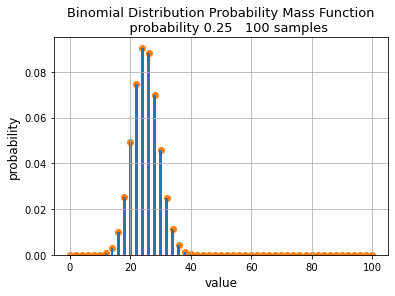

In [7]:
# PMF for the binomial distribution
from scipy.stats import binom
# define the parameters of the distribution
# example = (p is probability, k is number of samples)
example = (0.25, 100)
# define the distribution
dist = binom(example[1], example[0])
# calculate the probability of n successes
dist_pmf = []
dist_n = []
for n in range(0, 102, 2):
    # print('P of %d success: %.3f%%' % (n, dist.pmf(n)*100))
    dist_pmf.append(dist.pmf(n))
    dist_n.append(n)
plt.bar(dist_n, dist_pmf)
plt.scatter(dist_n, dist_pmf)
plt.title('Binomial Distribution Probability Mass Function\n\
    probability {}   {} samples'.format(example[0], example[1]), fontsize=13)
plt.ylabel('probability', fontsize=12)
plt.xlabel('value', fontsize=12)
plt.grid()
plt.show();

P of less than 0 success: 0.000%
P of less than 10 success: 0.000%
P of less than 20 success: 1.646%
P of less than 30 success: 54.912%
P of less than 40 success: 98.750%
P of less than 50 success: 99.999%
P of less than 60 success: 100.000%
P of less than 70 success: 100.000%
P of less than 80 success: 100.000%
P of less than 90 success: 100.000%
P of less than 100 success: 100.000%


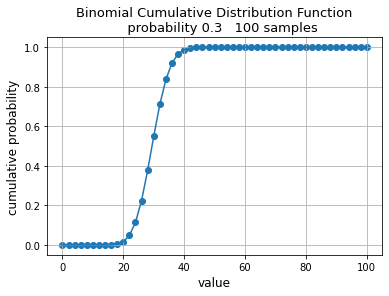

In [12]:
# CDF for the binomial distribution
from scipy.stats import binom
# define the parameters of the distribution
# example = (p is probability, k is number of samples)
example = (0.3, 100)
# define the distribution
dist = binom(example[1], example[0])
# calculate the probability of <=n successes
for n in range(0, 110, 10):
    print('P of less than %d success: %.3f%%' % (n, dist.cdf(n)*100))
dist_cdf = []
dist_n = []
for n in range(0, 102, 2):
    dist_cdf.append(dist.cdf(n))
    dist_n.append(n)
plt.clf()
plt.plot(dist_n, dist_cdf)
plt.scatter(dist_n, dist_cdf)
plt.grid()
plt.title('Binomial Cumulative Distribution Function\n\
    probability {}   {} samples'.format(example[0], example[1]), fontsize=13)
plt.ylabel('cumulative probability', fontsize=12)
plt.xlabel('value', fontsize=12)
plt.show();

cumulative P of less than 10 success: 0.000%
cumulative P of less than 20 success: 0.000%
cumulative P of less than 30 success: 0.000%
cumulative P of less than 40 success: 0.000%
cumulative P of less than 50 success: 0.002%
cumulative P of less than 60 success: 2.099%
cumulative P of less than 70 success: 53.766%
cumulative P of less than 80 success: 99.111%
cumulative P of less than 90 success: 100.000%
cumulative P of less than 100 success: 100.000%


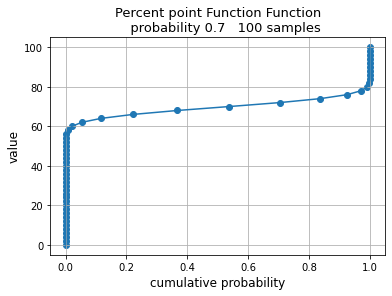

In [14]:
# PPF fuction - quantile
#example of using the binomial distribution
from scipy.stats import binom
# define the parameters of the distribution
# example = (p is probability, k is number of samples)
example = (0.7, 100)
# define the distribution
dist = binom(example[1], example[0])
# calculate the probability of <=n successes
for n in range(10, 110, 10):
    print('cumulative P of less than %d success: %.3f%%' % (n, dist.cdf(n)*100))
dist_cdf = []
dist_n = []
for n in range(0, 102, 2):
    dist_cdf.append(dist.cdf(n))
    dist_n.append(n)
plt.clf()
plt.plot(dist_cdf, dist_n)
plt.scatter(dist_cdf, dist_n)
plt.grid()
plt.title('Percent point Function Function\n\
    probability {}   {} samples'.format(example[0], example[1]), fontsize=13)
plt.xlabel('cumulative probability', fontsize=12)
plt.ylabel('value', fontsize=12)
plt.show();